In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [5]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().any()

CustomerID    False
gender        False
age           False
income        False
score         False
dtype: bool

In [8]:
df.isnull().values.any()

False

In [9]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


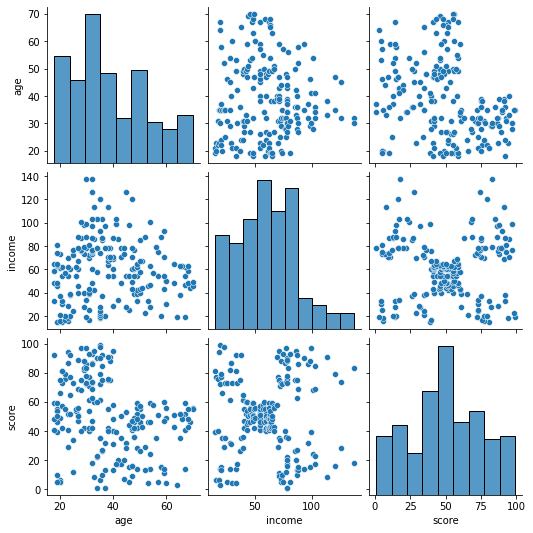

In [10]:
sbn.pairplot(df[['age','income','score']])

# K-Means Clustering Algorithm

In [11]:
import sklearn.cluster as cluster

In [12]:
kmeans = cluster.KMeans(n_clusters = 5)

In [13]:
kmeans = kmeans.fit(df[['score','income']])

In [14]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783]])

In [15]:
df['income_cluster'] = kmeans.labels_

In [16]:
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [17]:
df['income_cluster'].value_counts()

3    81
0    39
2    35
4    23
1    22
Name: income_cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

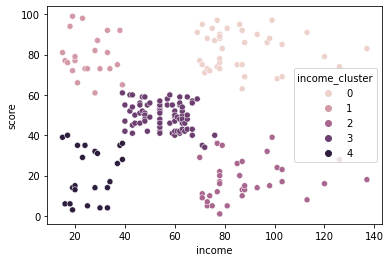

In [18]:
sbn.scatterplot(x='income',y='score',hue = 'income_cluster',data = df)

In [19]:
kmeans = cluster.KMeans(n_clusters = 2)

In [20]:
kmeans = kmeans.fit(df[['age','score']])

In [21]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [22]:
df['age_cluster'] = kmeans.labels_

In [23]:
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,2,0


In [24]:
df['age_cluster'].value_counts()

0    115
1     85
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

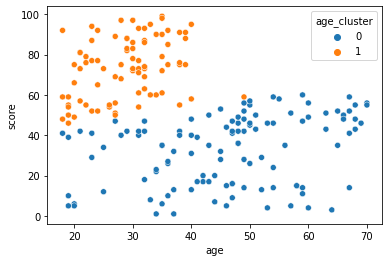

In [25]:
sbn.scatterplot(x='age',y='score',hue = 'age_cluster',data = df)

In [26]:
from sklearn.cluster import KMeans

In [27]:
k_range = range(1,12)
wcss = []

In [28]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

In [29]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30241.34361793659,
 25094.432930794686,
 22225.44886242279,
 19641.456216651564,
 17602.190468386776]

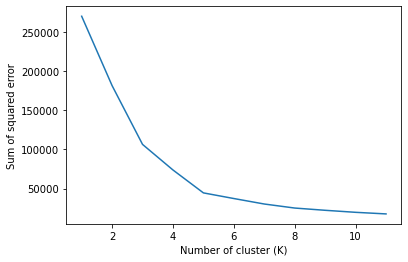

In [30]:
plt.xlabel('Number of cluster (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,wcss)